<a href="https://colab.research.google.com/github/alcarvalhox/Deep-Learning-Specialization-Coursera/blob/master/Int_vagoes_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U pandas-profiling 

     |████████████████████████████████| 256kB 27.9MB/s 
     |████████████████████████████████| 1.1MB 31.7MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 112kB 50.1MB/s 
     |████████████████████████████████| 81kB 9.6MB/s 
     |████████████████████████████████| 10.1MB 36.1MB/s 
     |████████████████████████████████| 645kB 44.0MB/s 
     |████████████████████████████████| 3.1MB 33.7MB/s 
     |████████████████████████████████| 296kB 44.8MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=8417a8dfdab71914e5d2c380b1bf345b8e1ee2a40e8b207ddfc25ec0aa9d1461
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=649e10260079fc2758a5980ac56aa855ab1fd41a1afb59ccce261b14ed7c8f7b
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075

In [ ]:
!pip install xlrd 

In [ ]:
!pip install openpyxl

In [ ]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from pandas_profiling import ProfileReport

In [ ]:
bd = pd.read_excel("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/RailBAM_3_vagoes.xlsx",engine='openpyxl')

In [ ]:
bd.to_csv("bd.csv",index=False)

In [ ]:
bd = pd.read_csv("bd.csv",sep = ',',encoding = 'utf8')

In [ ]:
bd.head()

Horário do trem     Site  ... Achatamento de pista de roda  ErsDB
0  2020-01-01 00:36:54  142.8km  ...                          NaN     57
1  2020-01-01 00:36:54  142.8km  ...                          NaN     58
2  2020-01-01 00:36:54  142.8km  ...                          NaN     60
3  2020-01-01 00:36:54  142.8km  ...                          NaN     64
4  2020-01-01 00:36:54  142.8km  ...                          NaN     60

[5 rows x 18 columns]

In [ ]:
bd.describe()

Número do veículo  ...          ErsDB
count      438871.000000  ...  438871.000000
mean           62.983526  ...      55.689758
std            41.359294  ...       4.274986
min             0.000000  ...      43.000000
25%            27.000000  ...      53.000000
50%            59.000000  ...      55.000000
75%            98.000000  ...      58.000000
max           181.000000  ...     102.000000

[8 rows x 7 columns]

In [ ]:
bd.dtypes

Horário do trem                  object
Site                             object
Tipo de sensor                   object
Número do veículo                 int64
Número do eixo do trem            int64
Identificação do veículo         object
Número do eixo do veículo       float64
Lateral do veículo               object
Número da roda                  float64
Velocidade do eixo                int64
Extremidade do eixo              object
Direção                          object
Lateral da linha                 object
Falha de rolamento               object
Alerta de rolamento               int64
Consistente                      object
Achatamento de pista de roda     object
ErsDB                             int64
dtype: object

In [ ]:
bd = bd.rename(columns={'Horário do trem': 'Horario'})
bd = bd.rename(columns={'Tipo de sensor':'Sensor'})
bd = bd.rename(columns={'Número do veículo':'N_veiculo'})
bd = bd.rename(columns={'Número do eixo do trem':'N_eixo'})
bd = bd.rename(columns={'Identificação do veículo':'ID_veiculo'})
bd = bd.rename(columns={'Número do eixo do veículo':'N_eixo_veiculo'})  
bd = bd.rename(columns={'Lateral do veículo':'Lat_veiculo'})
bd = bd.rename(columns={'Número da roda':'N_roda'})
bd = bd.rename(columns={'Velocidade do eixo':'Vel_eixo'})
bd = bd.rename(columns={'Extremidade do eixo':'Ext_eixo'})
bd = bd.rename(columns={'Direção':'Direcao'})
bd = bd.rename(columns={'Lateral da linha':'Lat_linha'})
bd = bd.rename(columns={'Achatamento de pista de roda':'Achatamento'})

In [ ]:
bd.isna().sum()

Horario                     0
Site                        0
Sensor                      0
N_veiculo                   0
N_eixo                      0
ID_veiculo             116288
N_eixo_veiculo         116288
Lat_veiculo            116288
N_roda                 438871
Vel_eixo                    0
Ext_eixo                    0
Direcao                     0
Lat_linha                   0
Falha de rolamento          0
Alerta de rolamento         0
Consistente            376407
Achatamento             29463
ErsDB                       0
dtype: int64

In [ ]:
bd['Falha de rolamento'].unique()

array(['.', 'RS3', 'NOISY(RS3)', 'FBS(RS2)', 'RS3_p', 'RS1_p', 'RS1_e',
       'FBS(4)', 'RS1', 'RS2', 'NOISY(RS2)', 'FBS(RS3)', 'RS2_n',
       'FBS(RS1)', 'NOISY(4)', 'RS2_p', 'RS1_n', 'FBS(RS1_p)', 'RS3_n',
       'NOISY(RS1)', 'FBS(RS1_e)', 'Shrk(4)', 'RS3_m', 'Shrk(RS3)',
       'FBS(RS1_n)', 'Shrk(RS2)', 'RS2_m', 'NOISY(RS1_p)', 'FBS(RS3_p)',
       'Shrk(RS1)', 'RS2_r', 'RS3_r', 'FBS(RS2_p)', 'Clpd(4)',
       'Clpd(RS1)', 'FBS(RS2_n)'], dtype=object)

In [ ]:
bd["Falha de rolamento"] = bd["Falha de rolamento"].replace({"RS3": 3,"NOISY(RS3)":0,"FBS(RS2)":0,"RS3_p":3,"RS1_p":1,"RS1_e":1,
                                       "FBS(4)":0,"RS1":1,"RS2":2,"NOISY(RS2)":0,"FBS(RS3)":0,"RS2_n":2,
                                       "FBS(RS1)":0,"NOISY(4)":0,"RS2_p":2,"RS1_n":1,"FBS(RS1_p)":0,"RS3_n":3,
                                       "NOISY(RS1)":0,"FBS(RS1_e)":0,"Shrk(4)":0,"RS3_m":3,"Shrk(RS3)":0,
                                       "FBS(RS1_n)":0,"Shrk(RS2)":0,"RS2_m":2,"NOISY(RS1_p)":0,"FBS(RS3_p)":0,
                                       "Shrk(RS1)":0,"RS2_r":2,"RS3_r":3,"FBS(RS2_p)":0,"Clpd(4)":0,
                                       "Clpd(RS1)":0,"FBS(RS2_n)":0})

In [ ]:
bd["Falha de rolamento"] = bd["Falha de rolamento"].replace({"RS3": 3,"NOISY(RS3)":3,"FBS(RS2)":2,"RS3_p":3,"RS1_p":1,"RS1_e":1,
                                       "FBS(4)":4,"RS1":1,"RS2":2,"NOISY(RS2)":2,"FBS(RS3)":3,"RS2_n":2,
                                       "FBS(RS1)":1,"NOISY(4)":4,"RS2_p":2,"RS1_n":1,"FBS(RS1_p)":1,"RS3_n":3,
                                       "NOISY(RS1)":1,"FBS(RS1_e)":1,"Shrk(4)":4,"RS3_m":3,"Shrk(RS3)":3,
                                       "FBS(RS1_n)":1,"Shrk(RS2)":2,"RS2_m":2,"NOISY(RS1_p)":1,"FBS(RS3_p)":3,
                                       "Shrk(RS1)":1,"RS2_r":2,"RS3_r":3,"FBS(RS2_p)":2,"Clpd(4)":4,
                                       "Clpd(RS1)":1,"FBS(RS2_n)":2})

In [ ]:
bd['Falha de rolamento'].unique()

array(['.', 3, 2, 1, 4], dtype=object)

In [ ]:
bd.head()

Horario     Site   Sensor  ...  Consistente  Achatamento ErsDB
0  2020-01-01 00:36:54  142.8km  RAILBAM  ...          NaN          NaN    57
1  2020-01-01 00:36:54  142.8km  RAILBAM  ...          NaN          NaN    58
2  2020-01-01 00:36:54  142.8km  RAILBAM  ...          NaN          NaN    60
3  2020-01-01 00:36:54  142.8km  RAILBAM  ...          NaN          NaN    64
4  2020-01-01 00:36:54  142.8km  RAILBAM  ...          NaN          NaN    60

[5 rows x 18 columns]

In [ ]:
#newdf = bd[(bd.ID_veiculo == "GDT 735078")]
newdf1 = bd[bd['ID_veiculo']== "GDT 730269"]
newdf2 = bd[bd['ID_veiculo']== "GDT 731340" ]

In [ ]:
newdf = pd.concat([newdf1, newdf2])

In [ ]:
newdf.head()

Horario     Site   Sensor  ...  Consistente  Achatamento ErsDB
43163  2020-01-04 00:56:32  142.8km  RAILBAM  ...          NaN            .    51
43164  2020-01-04 00:56:32  142.8km  RAILBAM  ...          NaN            .    54
43165  2020-01-04 00:56:32  142.8km  RAILBAM  ...          NaN            .    50
43166  2020-01-04 00:56:32  142.8km  RAILBAM  ...          NaN            .    55
43167  2020-01-04 00:56:32  142.8km  RAILBAM  ...          NaN            .    52

[5 rows x 18 columns]

In [ ]:
profile = ProfileReport(bd, title="Pandas Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile = ProfileReport(newdf, title="Pandas Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
bd_resumo = newdf[['Horario','Site','Sensor','N_veiculo','N_eixo','Vel_eixo','Ext_eixo','Direcao',
                'Lat_linha','Falha de rolamento','Alerta de rolamento','ErsDB']]

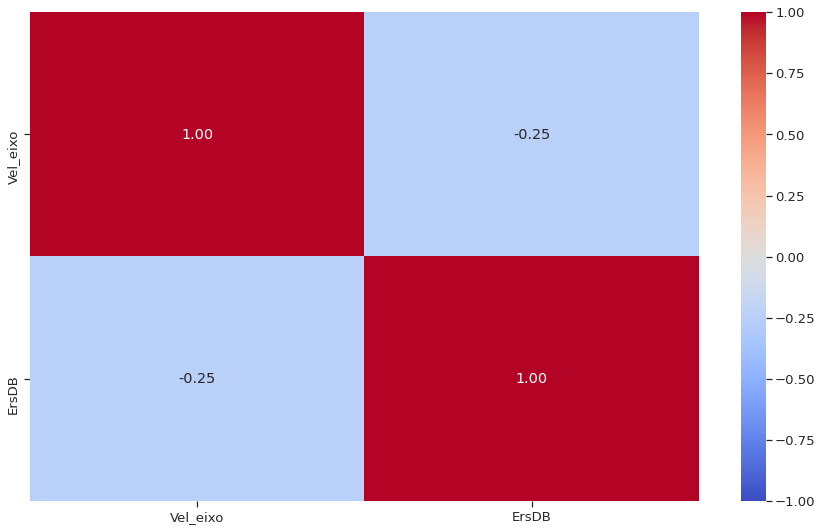

In [ ]:
plt.figure(figsize=(15,9))
sns.set(style="ticks", color_codes=True,font_scale = 1.2)
dfpdr= bd_resumo[['Vel_eixo','ErsDB']]
sns.heatmap(dfpdr.corr(), cmap = 'coolwarm', vmin = -1, vmax = 1, annot = True, fmt = '.2f')

In [ ]:
plt.rcParams["figure.figsize"] = [30,25]
sns.set(style="ticks", color_codes=True,font_scale = 1.2)
sns.boxplot( data = dfpdr, showfliers = True)

In [ ]:
#newdf_filtrado = newdf[bd['ErsDB']!= 0 ]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

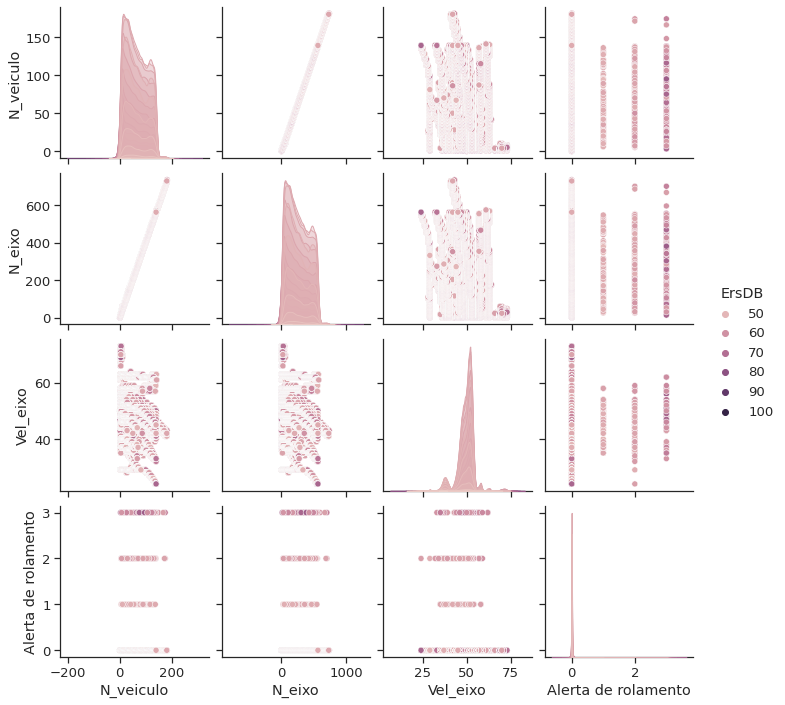

In [ ]:
sns.pairplot(dfpdr['Falha de rolamento'], hue = 'ErsDB')

In [ ]:
newdf['Alerta de rolamento'].unique()

array([0])

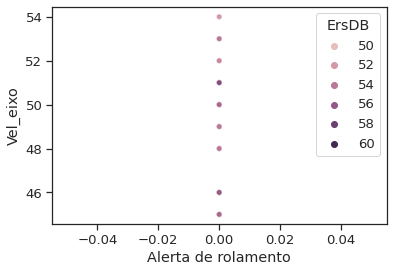

In [ ]:
sns.scatterplot(x = dfpdr['Alerta de rolamento'], y = dfpdr['Vel_eixo'],data=dfpdr,s=30,hue = dfpdr['ErsDB'])

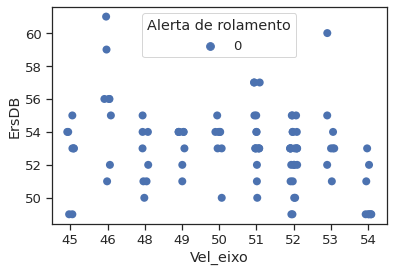

In [ ]:
sns.stripplot(x=dfpdr['Vel_eixo'], y=dfpdr['ErsDB'], hue=dfpdr['Alerta de rolamento'],s=8, data=dfpdr)

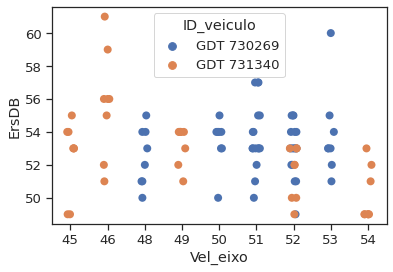

In [ ]:
sns.stripplot(x=newdf['Vel_eixo'], y=newdf['ErsDB'], hue=newdf['ID_veiculo'],s=8, data=newdf)

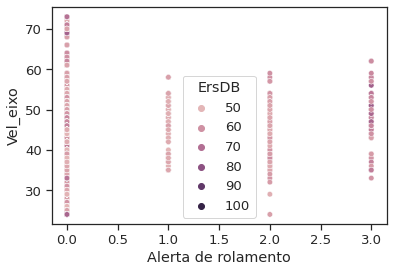

In [ ]:
sns.scatterplot(x = bd['Alerta de rolamento'], y = bd['Vel_eixo'],data=bd,s=30,hue = bd['ErsDB'])

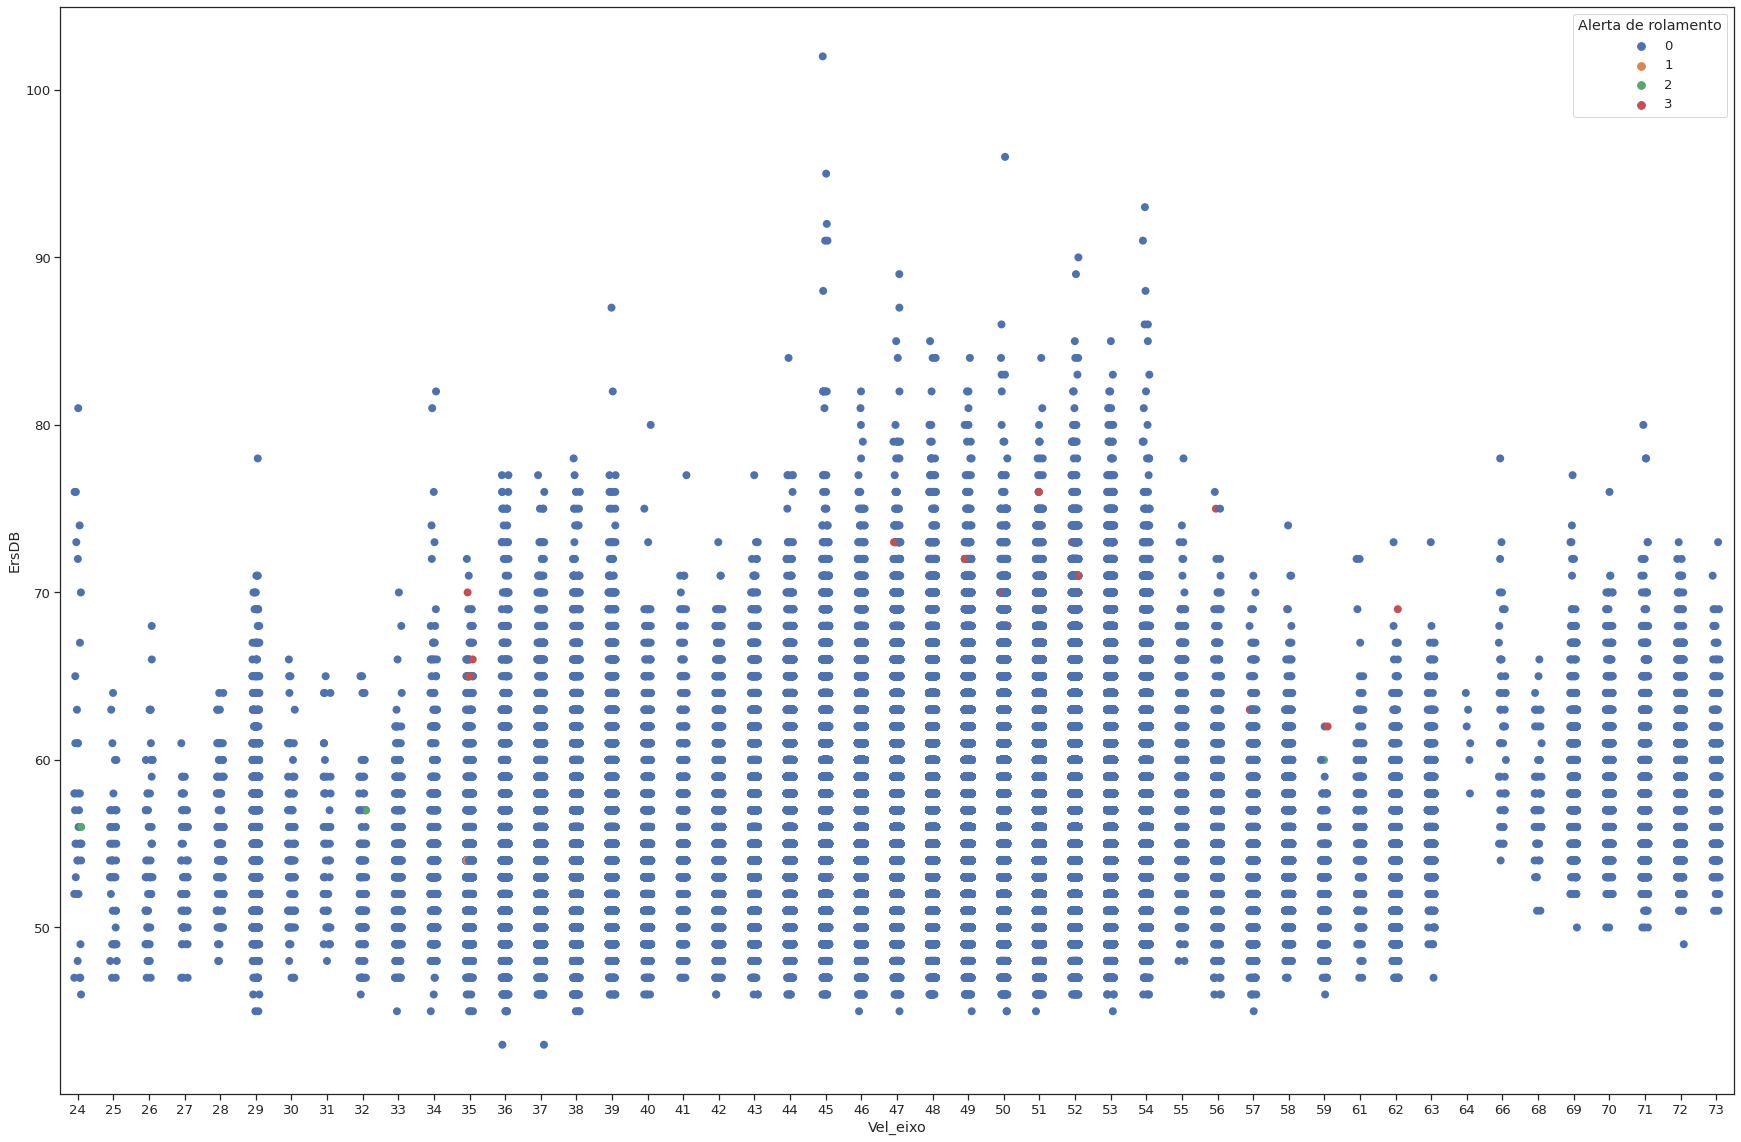

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 30,20

sns.stripplot(x=bd['Vel_eixo'], y=bd['ErsDB'], hue=bd['Alerta de rolamento'],s=8, data=bd)

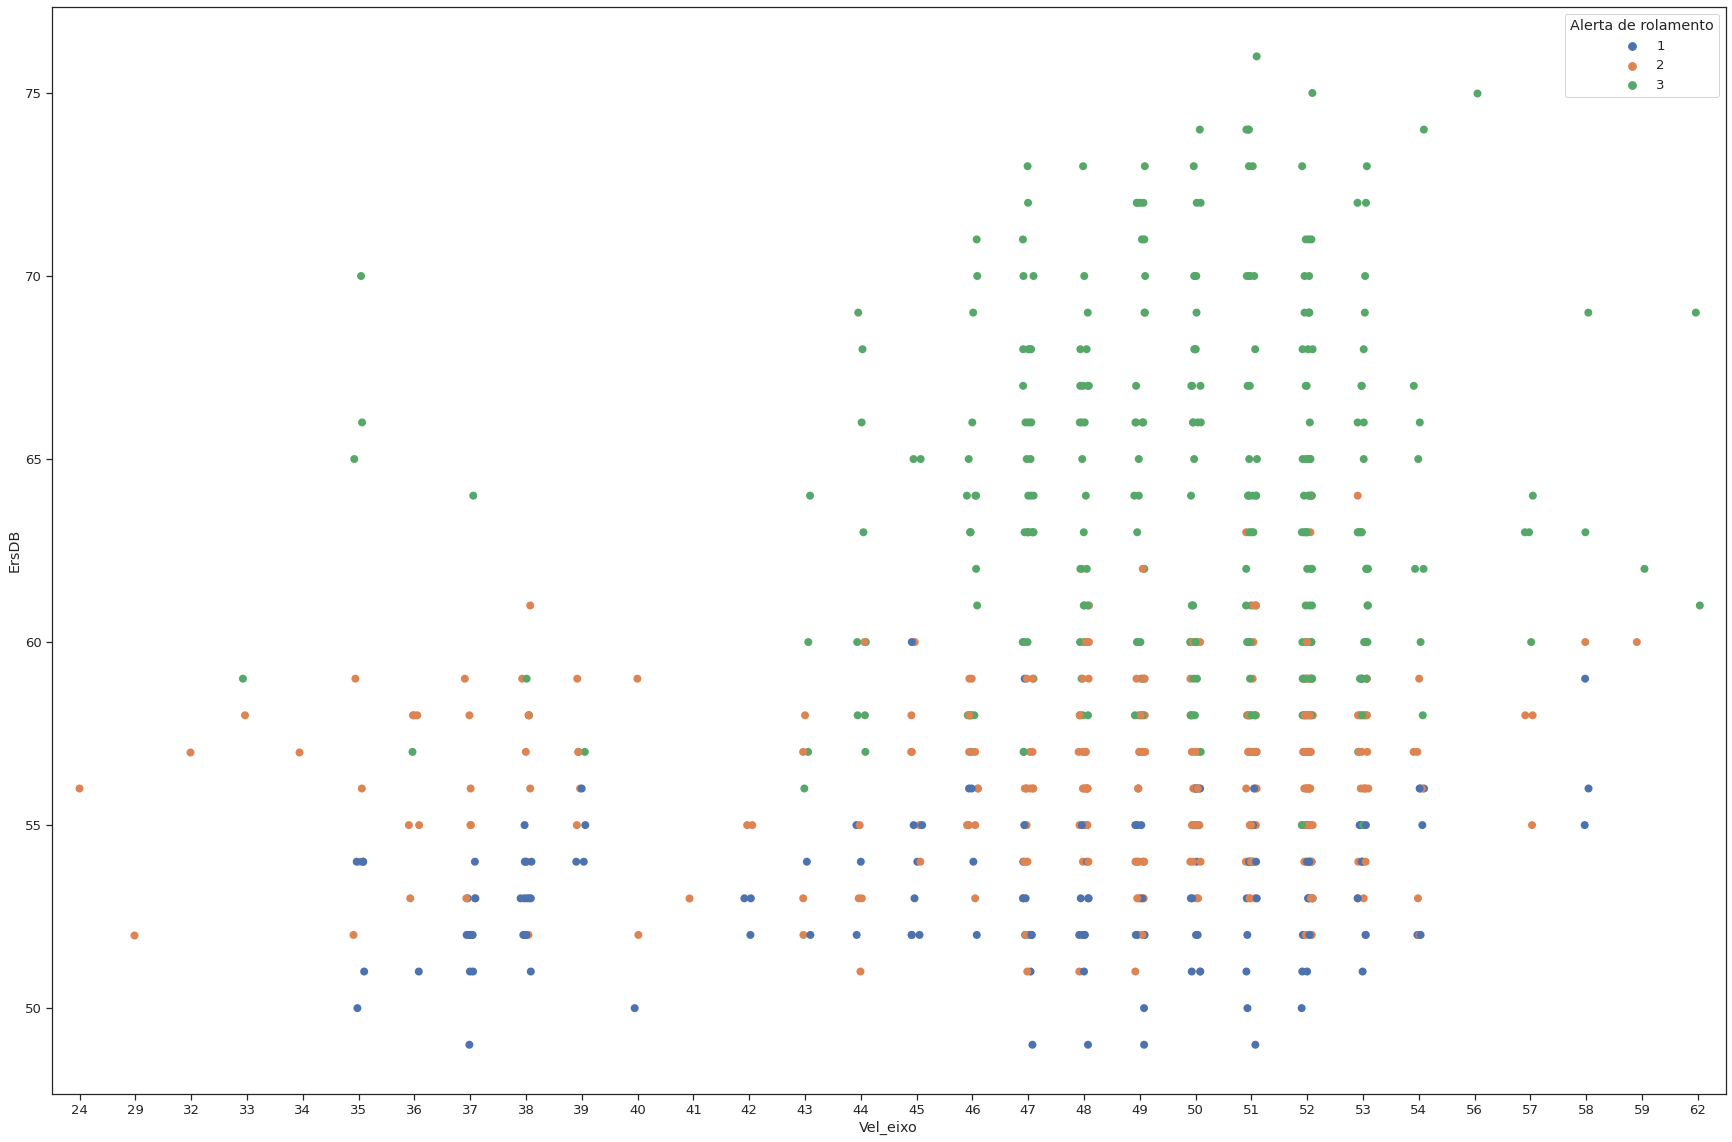

In [ ]:
rcParams['figure.figsize'] = 30,20
bd_filtrado = bd[bd['Alerta de rolamento']!= 0 ]
sns.stripplot(x=bd_filtrado['Vel_eixo'], y=bd_filtrado['ErsDB'], hue=bd_filtrado['Alerta de rolamento'],s=8, data=bd_filtrado)

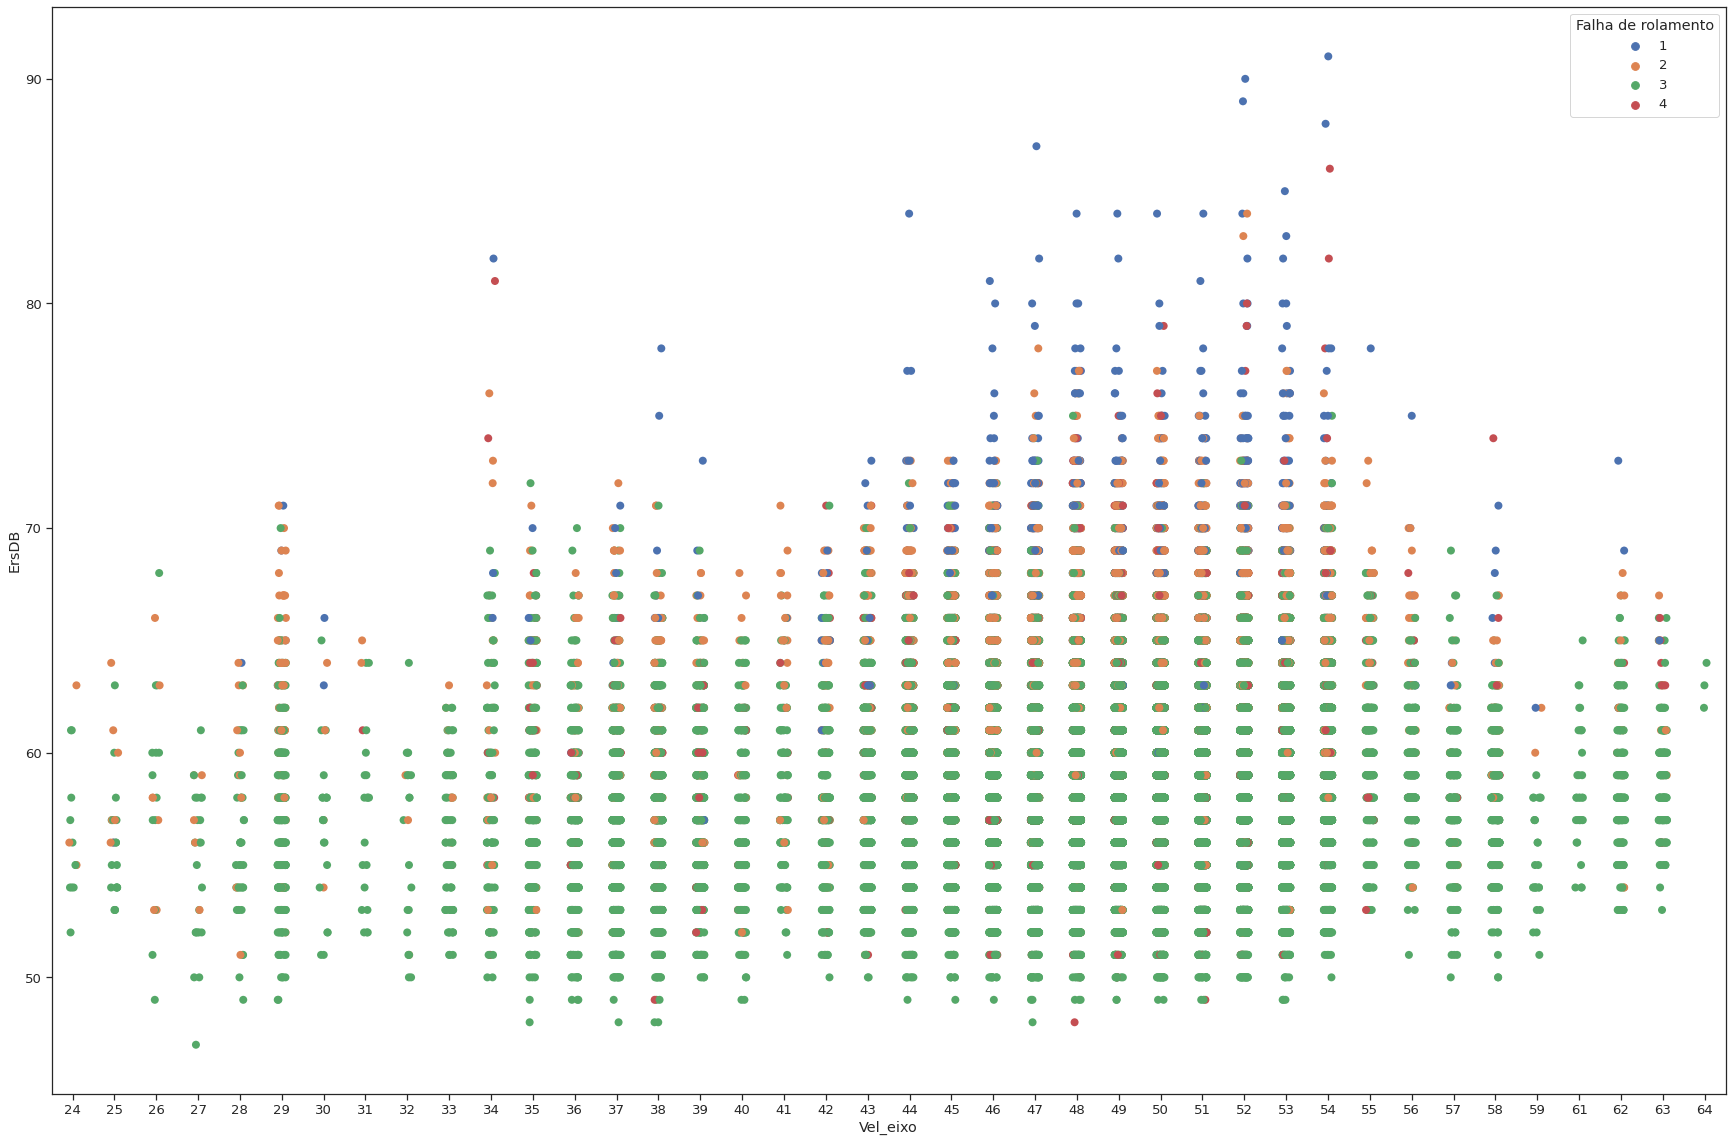

In [ ]:
rcParams['figure.figsize'] = 30,20
newdf_filtrado = bd[bd['Falha de rolamento']!= '.' ]
sns.stripplot(x=newdf_filtrado['Vel_eixo'], y=newdf_filtrado['ErsDB'], hue=newdf_filtrado['Falha de rolamento'],s=8, data=newdf_filtrado)

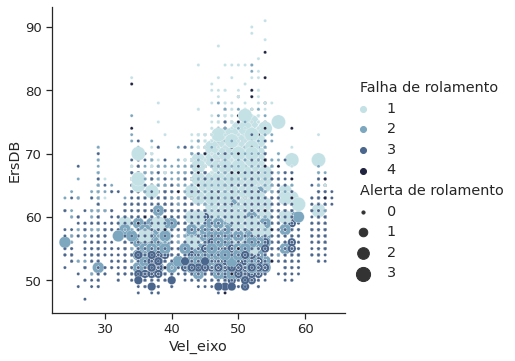

In [ ]:
rcParams['figure.figsize'] = 30,20
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=newdf_filtrado,
    x="Vel_eixo", y="ErsDB",
    hue="Falha de rolamento", size="Alerta de rolamento",
    palette=cmap, sizes=(10, 200),
)
#g.set(xscale="log", yscale="log")
#g.ax.xaxis.grid(True, "minor", linewidth=.25)
#g.ax.yaxis.grid(True, "minor", linewidth=.25)
#g.despine(left=True, bottom=True)

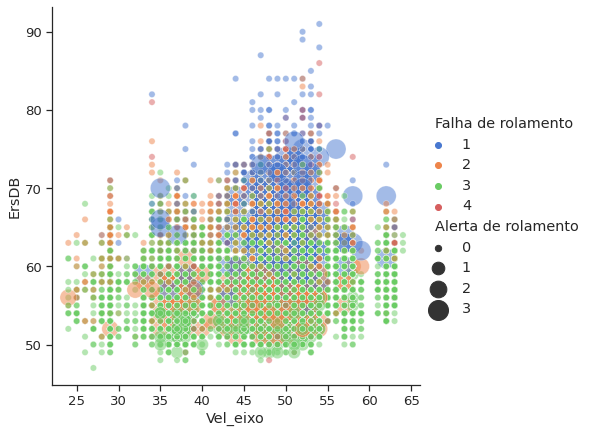

In [ ]:
sns.relplot(x="Vel_eixo", y="ErsDB", hue="Falha de rolamento", size="Alerta de rolamento",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=newdf_filtrado)

In [ ]:
bdv = pd.read_excel("/content/drive/MyDrive/Projetos/Projeto Inteligencia Vagoes/CMRO_0096_ 3_vagoes.xlsx",engine='openpyxl')

In [ ]:
bdv.to_csv("bdv.csv",index=False)

In [ ]:
bdv = pd.read_csv("bdv.csv",sep = ',',encoding = 'utf8')

In [ ]:
bdv.head(5)

Data de Criação  ...                                        Observacoes
0  2020-02-06 15:52:24  ...  DURANTE INSPEÇÃO PROGRAMADA EM FPK FOI INSPECI...
1  2020-05-19 11:26:42  ...                      Estribo lado E empenado, FZN.
2  2020-05-19 11:26:42  ...                                 Desempenou estribo
3  2020-05-30 11:11:31  ...  Informações passadas pela equipe A de FTX(Gels...
4  2020-05-30 11:11:31  ...  Conforme relatório de atendimento externo info...

[5 rows x 68 columns]

In [ ]:
bdv['Desc. Problema'].unique

<bound method Series.unique of 0                                 FREIO MANUAL
1                                      ESTRIBO
2                                      ESTRIBO
3                              SAPATA DE FREIO
4                              SAPATA DE FREIO
5         VAGÃO PARA MANUTENÇÃO PREVENTIVA VR4
6     DDV - DETECTOR DESCARRILAMENTO (ISOLADO)
7     DDV - DETECTOR DESCARRILAMENTO (ISOLADO)
8                                          NaN
9                                          NaN
10        VAGÃO PARA MANUTENÇÃO PREVENTIVA VR4
11                                         NaN
12                              ALARME RAILBAM
13                              ALARME RAILBAM
14                              ALARME RAILBAM
15                              ALARME RAILBAM
16                              ALARME RAILBAM
17                              ALARME RAILBAM
18                              ALARME RAILBAM
19                TRANSFERÊNCIA ENTRE OFICINAS
20                           

In [ ]:
rcParams['figure.figsize'] = 30,20
sns.stripplot(x=bd['Vel_eixo'], y=bd['ErsDB'], hue=bd['Falha de rolamento'],s=8, data=bd)